In [ ]:
import pandas as pd
def load_prepare_data(path):
  """
  Funci√≥n para cargar y procesar datos para el ejercicio.
  """
  df = pd.read_csv(path,sep=",")
  map_classes = {
    "religion":1,
    "age":1,
    "ethnicity":1,
    "gender":1,
    "other_cyberbullying":1,
    "not_cyberbullying":0,
  }
  df["cyberbullying"] = df.cyberbullying_type.map(map_classes)
  return df[["tweet_text","cyberbullying"]].copy()

# Ejercicio


En este ejercicio vamos a trabajar con un conjunto de datos procedente de medios sociales online.

Uno de los mayores problemas en el internet de hoy en d√≠a es la presencia de actitudes negativas hacia algunos colectivos en relaci√≥n a su etnia, g√©nero, religi√≥n o ideolog√≠a pol√≠tica. En este ejercicio trabajaremos con un conjunto de datos reales, etiquetados manualmente, procedentes de la plataforma [Kaggle](https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification/data). Originalmente, a cada documento del dataset se le asign√≥ una de las siguientes categor√≠as:
- *religion*
- *age*
- *ethnicity*
- *gender*
- *other_cyberbullying*
- *not_cyberbullying*


El objetivo inicial del dataset era su uso para entrenar un modelo capaz de detectar el tipo de contenido de odio presente en internet seg√∫n el colectivo al que se atacaba. En este caso, para simplificar el ejercicio, se ha generado una funci√≥n `load_prepare_data()` que cambia las categor√≠as del dataset obten√≠endose al final 2 categor√≠as con valor 1 o 0, indicando si el tweet tiene contenido de odio

Para el ejercicio deb√©is entrenar diferentes modelos de clasificaci√≥n que permitan clasificar correctamente los tweets. Para ello ser√° necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorizaci√≥n de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificaci√≥n. Para que os sirva de orientaci√≥n, los criterios de evaluaci√≥n del ejercicio ser√°n los siguientes:

-	**An√°lisis exploratorio, pre-procesado y normalizaci√≥n de los datos (30%)**:
        -	El ejercicio deber√° contener un an√°lisis exploratorio de los datos como n√∫mero de documentos, gr√°ficas de distribuci√≥n de longitudes y/o wordclouds, entre otros an√°lisis que se os pudieran ocurrir. Vuestros ejercicios deber√°n incorporar al menos los an√°lisis exploratorios vistos en clase.

    -	Tambi√©n tendr√©is que tener funciones para normalizar textos que permitan eliminar palabras vac√≠as, quitar s√≠mbolos de puntuaci√≥n y lematizar o hacer stemming.  

-	**Vectorizaci√≥n de textos (40%)**

    En clase hemos visto diferentes estrategias de vectorizaci√≥n como TF-IDF y Word Embeddings. Ser√° necesario incorporar caracter√≠sticas adicionales como el sentimiento o caracter√≠sticas l√©xicas.

-	**Entrenamiento y validaci√≥n del sistema (30%)**
  -	En el proceso de entrenamiento del modelo tendr√©is que testear al menos 3 modelos de clasificaci√≥n. El procedimiento debe ser similar al visto en clase, en el que primero estim√°bamos el rendimiento de varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperpar√°metros.


**Nota 1**: El ejercicio propuesto es similar a los ejercicios de clasificaci√≥n visto en clase, por lo que es importante que document√©is y expliqu√©is adecuadamente (con vuestras palabras) los procesos llevados a cabo en el ejercicio. No hacerlo puede llegar a penalizar hasta 1 punto en la calificaci√≥n final.

**Nota 2**: Cualquier c√°lculo adicional a los vistos en clase (visualizaciones, nuevas caracter√≠sticas a√±adidas al modelo...) ser√° valorado positivamente en la calificaci√≥n.

## 0. Imports


In [ ]:
import sys
!{sys.executable} -m pip install contractions
!pip install spacy==3.2.1
!pip install emoji_extractor
from emoji_extractor.extract import Extractor
!python -m spacy download en_core_web_sm
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# Download emoji sentiment
!wget https://www.clarin.si/repository/xmlui/handle/11356/1048/allzip
!unzip allzip
# Instalar la fuente Noto Color Emoji
!apt-get install -y fonts-noto-color-emoji

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 289.9/289.9 kB 4.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 110.7/110.7 kB 13.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.1/6.1 MB 7.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 659.5/659.5 kB 9.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47.3/47.3 kB 5.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 126.0/126.0 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: wasabi
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


--2024-04-18 08:47:58--  https://www.clarin.si/repository/xmlui/handle/11356/1048/allzip
Resolving www.clarin.si (www.clarin.si)... 95.87.154.205
Connecting to www.clarin.si (www.clarin.si)|95.87.154.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‚Äòallzip‚Äô

allzip                  [  <=>               ]  94.61K   419KB/s    in 0.2s    

2024-04-18 08:47:59 (419 KB/s) - ‚Äòallzip‚Äô saved [96878]

Archive:  allzip
  inflating: ESR_v1.0_format.txt     
  inflating: Emoji_Sentiment_Data_v1.0.csv  
  inflating: Emojitracker_20150604.csv  
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-noto-color-emoji
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 9,944 kB of archives.
After this operation, 11.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-upda

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import contractions

## 1. Obtenci√≥n del corpus
Para la obtenci√≥n de los datos teneis disponible la funci√≥n `load_prepare_data()`. Esta funci√≥n prepara los datos del ejercicio en formato Pandas dataframe para que podais realizarlo.

In [ ]:
path_data = "https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/cyberbullying_tweets.csv"
# Path de datos alternativos en caso de que el anterior no funcione (al estar alojado en github puede haber limitaciones
# en la descarga.
# path_data = "https://zenodo.org/records/10938455/files/cyberbullying_tweets.csv?download=1"
dataset = load_prepare_data(path_data)

In [ ]:
dataset.head(4)

tweet_text  cyberbullying
0  In other words #katandandre, your food was cra...              0
1  Why is #aussietv so white? #MKR #theblock #ImA...              0
2  @XochitlSuckkks a classy whore? Or more red ve...              0
3  @Jason_Gio meh. :P  thanks for the heads up, b...              0

## 2. An√°lisis exploratorio

Para empezar con el ejercicio propuesto vamos a comenzar con un primer analisis exploratorio del dataset. Llevar a cabo un an√°lisis exploratorio de los documentos es un proceso m√°s complejo que el an√°lisis llevado a cabo en datos num√©ricos debido a que la naturaleza no num√©rica del texto implica dificultades para el c√°lculo de estad√≠sticos t√≠picos como la media o desviaci√≥n t√≠pica. Sin embargo, si podremos analazar otra serie de caracteristicas:

In [ ]:
#Comprobaci√≥n del n¬∫ de filas y columnas del dataset
dataset.shape

(47692, 2)

El dataset est√° compuesto por 47.692 documentos y 2 columnas, que como se puede ver en el el "head()" del apartado anterior son los tweets y la varibale objetivo cyberbullyng.

Procedemos a comprobar el numero de categorias y valores que tenemos de la varibale objetivo:

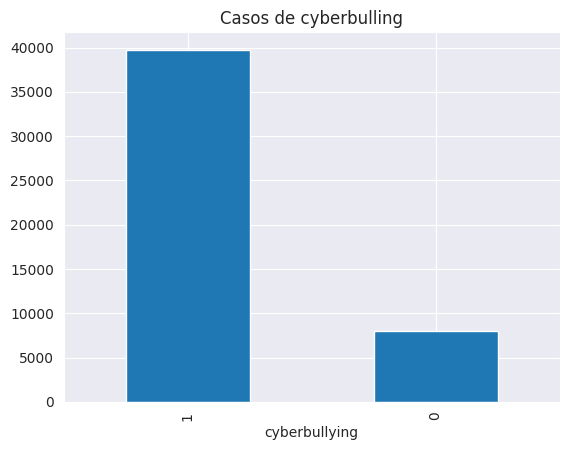

In [ ]:
# Comprobamos el numero de casos y valores de la variable objetivo cyberbullying
dataset.cyberbullying.value_counts().plot(kind='bar')
plt.title('Casos de cyberbulling')
plt.show()


La varibale objetivo es bimodal y hay un claro desbalanceo, un considerable numero menor de 0 (casos en los que no hay cyberbullyng) supone un problema para el modelo que queremos crear por lo que m√°s adelante aplicaremos algunas tecnicas para solventarlo

Comprobamos si hay valores nulos:

In [ ]:
# Checkeamos valores nulos en el datset
dataset.isnull().sum()

tweet_text       0
cyberbullying    0
dtype: int64

Perfecto! no hay valores nulos en ninguna de las columnas.

Debido a la naturaleza de la red social, los retweets pueden provocar que haya tweets duplicados, comprobamos que no los haya tampoco y en caso de haber procedemos a eliminarlos:

In [ ]:
#Comprobamos cuantos duplicados hay
dataset.duplicated(subset=["tweet_text"]).sum()

1675

In [ ]:
#Eliminamos duplicados
dataset = dataset.drop_duplicates(subset=["tweet_text"])

In [ ]:
#Volvemos a comprobar que se haya realizado la eliminaci√≥n correctamente
dataset.duplicated(subset=["tweet_text"]).sum()

0

In [ ]:
# Comprobamos que el numero de documentos ha disminuido acorde con la eliminaci√≥n de duplicados
dataset.shape

(46017, 2)

### **Analisis de longuitudes de los tweets**

Procedemos a comprobar y a a√±adir como caracteristica la longitud de cada tweets:

In [ ]:
#A√±adimos la columna "tweet_len" como la longuitud de cada tweet
dataset["tweet_len"] = dataset["tweet_text"].apply(lambda x: len(x))

<Figure size 1400x1200 with 0 Axes>

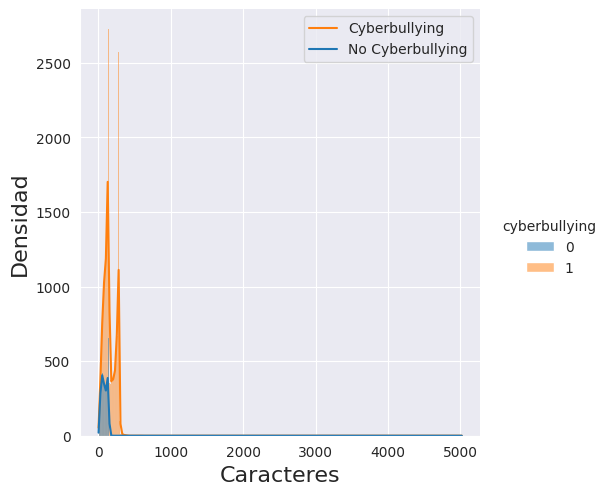

In [ ]:
# Graficamos las longitudes de los documentos asociados a cada categor√≠a
fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")

sns.displot(data=dataset, x="tweet_len", hue="cyberbullying", kde=True, legend=True)
plt.legend(["Cyberbullying", "No Cyberbullying"])
# Definimos el t√≠tulo de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)
plt.show()

Lo primero que llama la atenci√≥n es que hay unos pocos tweets demasiado largos... Cada tweet puede tener como maximo 280 caracteres desde 2017, el l√≠mite anterior a este a√±o eran 140 caracteres. Los datos pertenecen al a√±o 2020 por lo que vamos a interpretar que como maximo cada tweet pueda tener 280 caracteres.

Sin embargo, primero de todo, vamos a ver que problema puede estar habiendo con esos tweets tan largos:

In [ ]:
# Filtramos los tweets demasiado largos e imprimmos por pantalla alguno para intentar inferir el problema
tweets_largos = dataset.loc[dataset['tweet_len'] > 280]
print(tweets_largos.iloc[0,0])


@EurekAlertAAAS: Researchers push to import top anti-bullying program to US schools http://t.co/UPZrMbl
@NomCookiesNom Instead of personal attacks, maybe you can explain why there are more than 100 Islamic terrorist groups.
@_Finessinfool yea imma bring in tomorrow
#mkr I think Colin might not be a fan of the meatballs.
@KatieBatterman yeah, we should talk. I was just about to send an email over to them right before I was told it was retracted.
I'm not a fan of the bears from QLD. üí© #MKR
@eDRoaCH @orvtech this isn't de-anonymizing. the phone # wouldn't necessarily be stored. no names would be required.
@owlcity hey adam :) I've been to 2 of your concerts &amp; haven't been allowed to meet you. when will I be able to?
Me: The boat or the thing that melts Nazi faces?
Watching a video of the snowman play from primary school! Go Tanners Wood haha #oldschool
@eranubuwah @352_7538 Taking tiny villages while loosing major cities like Tikrit.
Sofro Bulling No Chat u_u
@greenlinerzjm The bes

In [ ]:
#Chequeamos la forma de estos tweets
print(tweets_largos.shape) #

(703, 3)


Vemos que hay 703 tweets con este problema

Como sospechabamos, vemos que en realidad no se corresponden con un unico tweet y la proporci√≥n de estos tweets es el 1.5%, los consideramos como outliers y procedemos a eliminarlos.

Parece que se hayan encadenado diferentes tweets por error. No parecen que la raz√≥n sea que esos documentos pertenezcan a hilos, ya que no vemos que estes relacionados.

 Podr√≠amos separarlos y a√±adirlos al dataset, sin embargo, habr√≠a que indicar de alguna forma la varibale objeto de cada uno. Lo cual se podr√≠a hacer pero no merece la pena siendo una incidencia tan peque√±a. Vamos a eliminarlos directamente para que nuestro modelo no aprenda de ellos ya que no es posible que hayan tweets tan largos.

In [ ]:
# Eliminamos los tweets largos
dataset = dataset.drop(tweets_largos.index, axis=0)

In [ ]:
# Comprobamos que el numero de documentos ha disminuido acorde con la eliminaci√≥n de duplicados
dataset.shape

(45314, 3)

<Figure size 1400x1200 with 0 Axes>

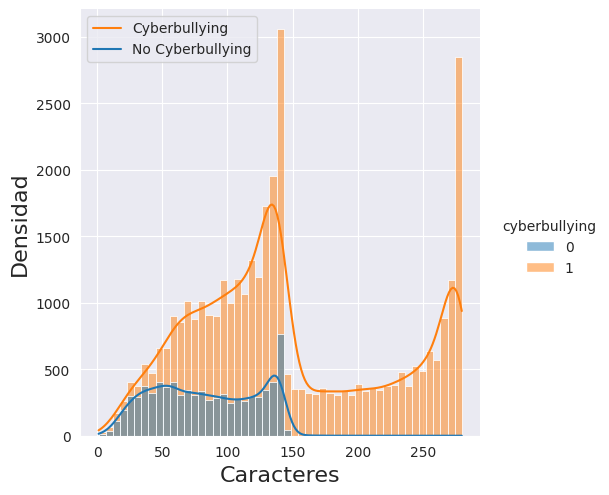

In [ ]:
# Volvemos a graficar las longitudes de los documentos asociados a cada categor√≠a
fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")

sns.displot(data=dataset, x="tweet_len", hue="cyberbullying", kde=True, legend=True)
plt.legend(["Cyberbullying", "No Cyberbullying"])
# Definimos el t√≠tulo de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)
plt.show()



```
# Tiene formato de c√≥digo
```

En el grafico anterior, con los outliers fuera, se puede observar de nuevo hay un mayor numero de documentos con bullying que sin √©l.

Especialmente, se observa esto en los tweets con mas de 140-150 carcteres, lo cual hace pensar que a partir de dichos n¬∫ de caracteres la probabilidad de que sea bullying es muy alta.

No me gusta nada ese comportamiento ya que en la realidad existen muchos casos en los que el numeros de caracteres es muy alto y no por ello deben de ser de odio. Esto nos indica que los datos pueden estar sesgados.

La distribuci√≥n en los casos de ciberbullying presenta una mayor proporci√≥n a medida que los tweets son mas largos, llegando a un pico alrededor de los 140-150 caracteres (la mitad del maximo de caracteres permitidos). Desp√∫es de ah√≠ baja y vuelve a crecer hasta un segundo maximo en el maximo de caracteres.

En el caso de NO cyberbulling la muestra cae en picado a partir de los 140-150 caracteres. La forma de la distribuci√≥n digamos que es bastante estable.

In [ ]:
dataset["+150 caract"] = dataset['tweet_text'].apply(lambda x: 1 if len(x) > 150 else 0)

### **An√°lisis de contenido de los tweets**

A continuaci√≥n, veremos que palabras son las mas utilizadas a priori de normalizarlas. M√°s adelante lo volveremos a hacer para ver como cambian

In [ ]:
# Separamos dataset en 2 por la varibale objetivo
txt_cat0 = ",".join(dataset[dataset.cyberbullying==0].tweet_text.to_list())
txt_cat1 = ",".join(dataset[dataset.cyberbullying==1].tweet_text.to_list())

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Definimos la nube de palabras
en_stopwords = stopwords.words('english')

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=0,
                      contour_color='steelblue', stopwords=en_stopwords,
                      normalize_plurals = True)

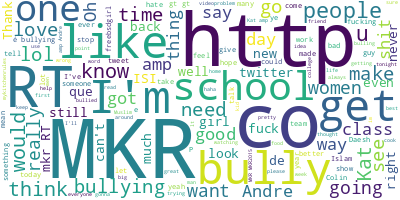

In [ ]:
# Genera el wordcloud
wordcloud.generate(txt_cat0)
# Visualizalo en una imagen
wordcloud.to_image()

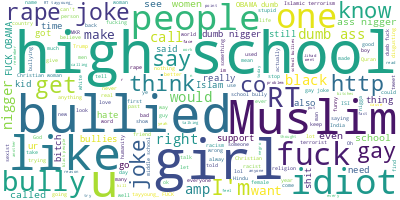

In [ ]:
# Genera el wordcloud
wordcloud.generate(txt_cat1)
# Visualizalo en una imagen
wordcloud.to_image()

En el wordcloud de la categor√≠a 0 se observa que hay una alta presencia de URLs (presencia de https y co), as√≠ como de school y bully . Son t√©rminos que no muestran opiniones.

En el wordcloud asociado a la categor√≠a 1 no se observa el t√©rmino https (es decir que habr√° menos URLs en el contenido). Aparecen adjetivos  como fucking, idiot, muslim, gay black, que pueden ser adjetivos usados de forma despectiva para meterse con alguien.

En general, se obserban similitudes en los t√©mrinos m√°s presentes en ambos grupos como school y bully, pero diferencias en el resto del contenido teniendo el segundo palabrotas.

### **Analisis de Emojis**

Vamos a hacer un peque√±o an√°lisis sobre los emojis en el conjunto de datos de trabajo. En primer lugar vamos a ver el n√∫mero de documentos que tienen emojis:

In [ ]:
# Funci√≥n para extraer emojis del texto en formato lista
def extract_emojis(text):
  extract = Extractor()
  emojis = extract.count_emoji(text, check_first=False)
  emojis_list = [key for key, _ in emojis.most_common()]
  return emojis_list

Creamos una varibale nueva con los emojis de cada tweet:

In [ ]:
dataset["emojis"] = dataset["tweet_text"].apply(lambda x: extract_emojis(x))

Calculamos los documentos que tiene emojis y los que no

In [ ]:
filas_con_icono = dataset[dataset['emojis'].apply(lambda x: len(x) >= 1)]
filas_sin_icono = dataset[dataset['emojis'].apply(lambda x: len(x) ==0)]

# Imprimir el resultado
print("N√∫mero de filas con al menos un icono:", len(filas_con_icono))
print("N√∫mero de filas sin iconos:", len(filas_sin_icono))

N√∫mero de filas con al menos un icono: 408
N√∫mero de filas sin iconos: 44906


Se observa que en torno el 1% de documentos tiene emojis. Esto indica que esta informaci√≥n a lo mejor no es extremadamente √∫til, sin embargo, vamos a tenerlo en cuenta. Vamos a ver el uso de emojis en cada una de las categor√≠as del dataset:

In [ ]:
# Filtrar las filas con icono y cyberbullying == 1
filas_con_icono_y_molestia_1 = filas_con_icono[filas_con_icono['cyberbullying'] == 1].emojis.to_list()

# Filtrar las filas con icono y cyberbullying == 0
filas_con_icono_y_molestia_0 = filas_con_icono[filas_con_icono['cyberbullying'] == 0].emojis.to_list()

Unimos en una lista no anidada todos los elementos de cada lista:

In [ ]:
filas_con_icono_y_molestia_1 = [item for sublist in filas_con_icono_y_molestia_1 for item in sublist]
filas_con_icono_y_molestia_0 = [item for sublist in filas_con_icono_y_molestia_0 for item in sublist]

Visualizamos el top-10 de resultados en un barplot:

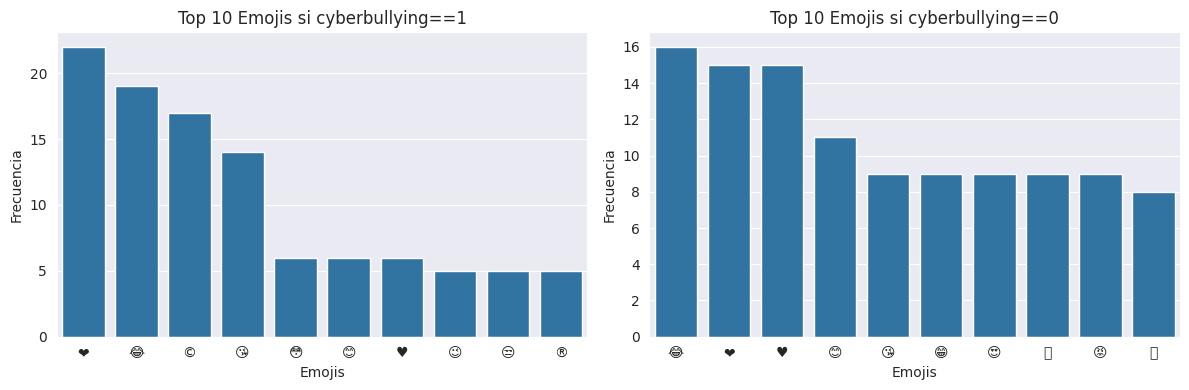

In [ ]:
from collections import Counter
from matplotlib import font_manager

freq_icono_y_molestia_1 = Counter(filas_con_icono_y_molestia_1)
freq_icono_y_molestia_0 = Counter(filas_con_icono_y_molestia_0)

emojis1, frecuencias_elementos1 = zip(*sorted(freq_icono_y_molestia_1.items(), key=lambda x: x[1], reverse=True)[:10])
emojis0, frecuencias_elementos0 = zip(*sorted(freq_icono_y_molestia_0.items(), key=lambda x: x[1], reverse=True)[:10])


fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Barplot 1
sns.barplot(x=emojis1, y=frecuencias_elementos1, ax=axes[0])
axes[0].set_xlabel('Emojis')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Top 10 Emojis si cyberbullying==1')

# Barplot 2
sns.barplot(x=emojis0, y=frecuencias_elementos0, ax=axes[1])
axes[1].set_xlabel('Emojis')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Top 10 Emojis si cyberbullying==0')

# Ajustar el dise√±o
plt.tight_layout()

# Mostrar la imagen
plt.show()

El resultado es llamativo. En ambos casos aparecen corazones, cosa que a priori no es muy normal que digamos. Podr√≠a deberse a sarcasmo en el caso de haber bullying. Tambi√©n vemos risas en ambos. Por ultimo, vemos que hay simbolos de una C y R que puede deberse a que se utilicen para que el algoritmo de twiter no detecte insultos o palabras malsonantes. En todo caso, un corpotamiento raro y en el que no se saca nada claro

## 3. Preprocesado y Normalizaci√≥n

### **Normalizaci√≥n**

En primer lugar eliminaremos espacios extras del texto y transformaremos todos los caracteres a min√∫sculas. Tambien lo meteremos en una varibale nueva llamada normalized:

In [ ]:
# Eliminar espacios
def eliminar_espacios(text):
    return  " ".join(text.split())

# To lower
def texto_to_lower(text):
  return text.lower()

In [ ]:
# Espacios
dataset["normalized"] = dataset["tweet_text"].apply(lambda x: eliminar_espacios(x))
dataset["normalized"] = dataset["normalized"].apply(lambda x: texto_to_lower(x))

Como en los textos pueden haber contracciones de palabras, siglas y diferentes expresiones y diferentes slangs para algunos ambitos procederemos a reemplazar dichas expresiones por su forma canonica mediante la libreria contractions:

In [ ]:
# Reemplazar contractions usando la librer√≠a "contractions" https://github.com/kootenpv/contractions
def replace_contraction(text):
    return contractions.fix(text, slang=True)

In [ ]:
dataset["normalized"] = dataset["normalized"].apply(lambda x: replace_contraction(x))

Depu√©s normalizamos URLs (tokens que comienzan por https:), menciones de twitter (tokens que comienzan por @) y n√∫meros. Aunque existen formas muy eficientes si se buscan patrones en el texto con expresiones regulares, vamos a optar por tokenizar el documento, y en funci√≥n de las caracter√≠sticas del token sustiuiremos el token o lo dejaremos igual.

In [ ]:
# Tokenizador
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

def normalizar_tokens(documento):
    # Dividir el documento en palabras
    palabras =  tweet_tokenizer.tokenize(documento)

    # Reemplazar URLs, menciones de Twitter y n√∫meros por los tokens correspondientes
    for i in range(len(palabras)):
        if palabras[i].startswith("http://") or palabras[i].startswith("https://") or palabras[i].startswith("www."):
            palabras[i] = "URL"
        elif palabras[i].startswith("@"):
            palabras[i] = "MENTION"
        elif palabras[i].isdigit():
            palabras[i] = "NUM"

    # Unir las palabras de nuevo en un documento modificado
    documento_modificado = ' '.join(palabras)

    return documento_modificado

Aplicamos la funci√≥n anterior al texto:

In [ ]:
dataset["normalized"] = dataset["normalized"].apply(lambda x: normalizar_tokens(x))

Por √∫ltimo llevamos a cabo la lematizaci√≥n, eliminaci√≥n de puntuaci√≥n y stopwords y lo guaardamos en una nueva columna:

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lematizar_eliminacion_tokens(texto):
    # Procesar el texto con el objeto nlp
    doc = nlp(texto)

    # Lematizar el texto
    lemas = [token.lemma_ for token in doc]

    # Eliminar s√≠mbolos de puntuaci√≥n y stopwords
    tokens_filtrados = [token for token in lemas if token.isalpha() and token.lower() not in en_stopwords]

    # Unir los tokens filtrados en un nuevo texto
    texto_procesado = ' '.join(tokens_filtrados)

    return texto_procesado

In [ ]:
dataset["preprocessed_text"] = dataset["normalized"].apply(lambda x: lematizar_eliminacion_tokens(x))

In [ ]:
dataset.head()

tweet_text  cyberbullying  \
0  In other words #katandandre, your food was cra...              0   
1  Why is #aussietv so white? #MKR #theblock #ImA...              0   
2  @XochitlSuckkks a classy whore? Or more red ve...              0   
3  @Jason_Gio meh. :P  thanks for the heads up, b...              0   
4  @RudhoeEnglish This is an ISIS account pretend...              0   

   tweet_len  +150 caract emojis  \
0         61            0     []   
1        115            0     []   
2         60            0     []   
3        103            0     []   
4        103            0     []   

                                          normalized  \
0  in other words #katandandre , your food was cr...   
1  why is #aussietv so white ? #mkr #theblock #im...   
2  MENTION a classy whore ? or more red velvet cu...   
3  MENTION meh . :p thanks for the heads up , but...   
4  MENTION this is an isis account pretending to ...   

                                   preprocessed_text  
0             word katandandre food crapilicious mkr  
1  aussietv white mkr theblock imacelebrityau tod...  
2            MENTION classy whore red velvet cupcake  
3  MENTION meh thank head concerned another angry...  
4  MENTION isis account pretend kurdish account l...

Una vez procesado el texto, vamos a rehacer los word clouds para interpretar mejor el contenido de √©ste con el texto ya preprocesado y visualizar el correcto funcionamiento del proceso:

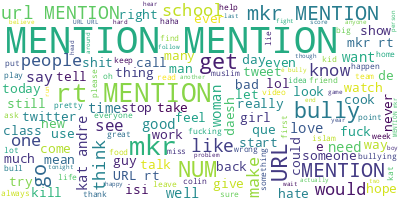

In [ ]:
txt_cat0 = ",".join(dataset[dataset.cyberbullying==0].preprocessed_text.to_list())
txt_cat1 = ",".join(dataset[dataset.cyberbullying==1].preprocessed_text.to_list())
#
# Genera el wordcloud
wordcloud.generate(txt_cat0)
# Visualizalo en una imagen
wordcloud.to_image()

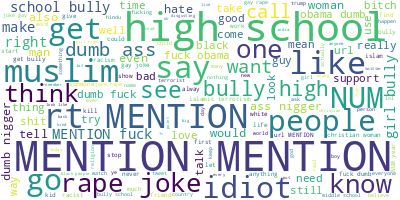

In [ ]:
# Genera el wordcloud
wordcloud.generate(txt_cat1)
# Visualizalo en una imagen
wordcloud.to_image()

En abos casos las menciones so el elemento m√°s representativo. Seguimos viendo insultos y algunas palabras sensible a ser utilizada de forma despectiva en el caso de los 1. En los casos de los 0 se aprecian varias siglas que nuestra libreria para reeemplazar no ha sabido hacerlo.

Una vez preprocesado, podr√≠amos calcular alguna caracter√≠stica adicional, como el n√∫mero de URLs o menciones:

In [ ]:
def token_appearance(document, token = "MENTION"):
  return len([x for x in document.split() if x == token])

In [ ]:
dataset["num_mention"] = dataset["preprocessed_text"].apply(lambda x: token_appearance(x, token="MENTION"))
dataset["num_URLS"] = dataset["preprocessed_text"].apply(lambda x: token_appearance(x, token="URL"))
dataset["num_NUM"] = dataset["preprocessed_text"].apply(lambda x: token_appearance(x, token="NUM"))

### **Caracter√≠sticas de sentimiento**

Adem√°s de las caracter√≠sticas anteriormente calculadas, vamos a llevar a cabo el c√°lculo de 5 caracter√≠sticas adicionales.

En primer lugar, debemos preprar un diccionario de emojis:

In [ ]:
# Preparar diccionario de emojis
def load_emoji_sentiment(path):
  # Cargamos el csv de emoji_sentiment
  emoji_sent_df = pd.read_csv(path,sep=",")
  # Calculamos los scores dividiendo el n√∫mero de emojis negativos y entre el total
  emoji_sent_df["Negative"] = emoji_sent_df["Negative"]/emoji_sent_df["Occurrences"]
  emoji_sent_df["Neutral"] = emoji_sent_df["Neutral"]/emoji_sent_df["Occurrences"]
  emoji_sent_df["Positive"] = emoji_sent_df["Positive"]/emoji_sent_df["Occurrences"]
  # Transformamos a dict
  emoji_sent_df = emoji_sent_df.set_index('Emoji')
  emoji_dict = emoji_sent_df.to_dict(orient="index")
  return emoji_dict

#Cargamos el diccionariod emojis
emoji_sent_dict = load_emoji_sentiment("Emoji_Sentiment_Data_v1.0.csv")

In [ ]:
#Cargamos el diccionariod emojis
#emoji_sent_dict = load_emoji_sentiment("Emoji_Sentiment_Data_v1.0.csv")

Despu√©s, calculamos caracter√≠sticas asociadas a los emoticonos utilizados en los documentos utilizando la siguiente funci√≥n get_emoji_sentiment:

In [ ]:
def get_emoji_sentiment(lista, option = "positive"):
  output = 0
  for emoji in lista:
    try:
      if option == "positive":
        output = output + emoji_sent_dict[emoji]["Positive"]
      elif option =="negative":
        output = output + emoji_sent_dict[emoji]["Negative"]
      elif option =="neutral":
        output = output + emoji_sent_dict[emoji]["Neutral"]
    except Exception as e:
      continue

  if len(lista)>=1:
    longitud = len(lista)
  else:
    longitud =1
  return output/ longitud

In [ ]:
dataset["sent_emoji_pos"] = dataset["emojis"].apply(lambda x: get_emoji_sentiment(x, "positive"))
dataset["sent_emoji_neu"] = dataset["emojis"].apply(lambda x: get_emoji_sentiment(x, "neutral"))
dataset["sent_emoji_neg"] = dataset["emojis"].apply(lambda x: get_emoji_sentiment(x, "negative"))

Adicionalmente, vamos a calcular el sentimiento asociado a los textos de los documentos utilizando TextBlob:

In [ ]:
from textblob import TextBlob
dataset["tweet_sentiment_polarity"] = dataset["preprocessed_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
dataset["tweet_sentiment_subjectivity"] = dataset["preprocessed_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [ ]:
dataset.loc[dataset['num_URLS'] == 1, :].head()


tweet_text  cyberbullying  \
10               @Jord_Is_Dead http://t.co/UsQInYW5Gn              0   
11   The Bully flushes on KD http://twitvid.com/A2TNP              0   
13  RT @Kurdsnews: Turkish state has killed 241 ch...              0   
18  Best pick up line? Hi, you're cute... ?: I lov...              0   
21  Kids Loveüòò‚ù§ @ Mohamad Bin Zayed City ŸÖÿØŸäŸÜÿ© ŸÖÿ≠ŸÖ...              0   

    tweet_len  +150 caract  emojis  \
10         36            0      []   
11         48            0      []   
13        138            0      []   
18        136            0      []   
21         76            0  [üòò, ‚ù§]   

                                           normalized  \
10                                        MENTION URL   
11                        the bully flushes on kd URL   
13  rt MENTION : turkish state has killed NUM chil...   
18  best pick up line ? hi , you are cute ... ? : ...   
21  kids love üòò ‚ù§ MENTION mohamad bin zayed city ŸÖ...   

                                    preprocessed_text  num_mention  num_URLS  \
10                                        MENTION URL            1         1   
11                                 bully flush kd URL            0         1   
13  rt MENTION turkish state kill NUM child last N...            1         1   
18  good pick line hi cute love people call james ...            0         1   
21  kid love MENTION mohamad bin zaye city ŸÖÿØŸäŸÜÿ© ŸÖ...            1         1   

    num_NUM  sent_emoji_pos  sent_emoji_neu  sent_emoji_neg  \
10        0        0.000000        0.000000        0.000000   
11        0        0.000000        0.000000        0.000000   
13        2        0.000000        0.000000        0.000000   
18        0        0.000000        0.000000        0.000000   
21        0        0.772423        0.179074        0.048503   

    tweet_sentiment_polarity  tweet_sentiment_subjectivity  
10                  0.000000                      0.000000  
11                  0.000000                      0.000000  
13                  0.000000                      0.066667  
18                  0.566667                      0.733333  
21                  0.500000                      0.600000

## 4. Vectorizaci√≥n

Despues de haber preprocesado el texto y haber preparado algunas caracteristicas extras para a√±adirlas m√°s tarde vamos a vectorizar el texto para que los algoritmos puedan aprender de ello.

Hay varias formas de hacerlo, sin embargo, nos decantamos con hacer una vectorizaci√≥n TF-IDF ......

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizador = TfidfVectorizer(lowercase = False, stop_words =None,
                               min_df=0.005, ngram_range = (1,3))

vector_data = vectorizador.fit_transform(dataset["preprocessed_text"])

In [ ]:
vector_data

<45314x406 sparse matrix of type '<class 'numpy.float64'>'
	with 372367 stored elements in Compressed Sparse Row format>

El resultado del proceso de vectorizaci√≥n nos devuelve vectores de tama√±o 406

### Incorporaci√≥n de caracter√≠sticas adicionales

A lo largo del notebook hemos ido calculando y a√±adiendo coumans al dataset como caracter√≠sticas adicionales que podr√≠an ayudar al clasificador a tener mejor rendimiento. Las vamos a a√±adir al resultado de la vectorizaci√≥n.


La forma m√°s sencilla de hacer esto es utilizar la librer√≠a scipy y generar una matriz sparse, comprensible por scikit-learn, que contenga tanto las caracter√≠sticas de TF-IDF como las calculadas manualmente.

En primer lugar, debemos seleccionar el conjunto de variables que queremos considerar en el entrenamiento. PAra ello hacemos uso del selector `dataframe[["nombre_columna1", "nombre_columna2"]]`:

In [ ]:
extra_features = dataset[['num_mention','num_URLS','num_NUM',
                          'tweet_sentiment_subjectivity','tweet_sentiment_polarity',
                          'sent_emoji_pos','sent_emoji_neg','sent_emoji_neu']]

Utilizamos la librer√≠a scipy (funci√≥n sparse.hstack) para unir las caracter√≠sticas TFIDF (contenidas en ¬¥vector_data¬¥) con las que acabamos de seleccionar (¬¥extra_features¬¥). Esta uni√≥n nos generar√° una matriz X que utilizaremos para hacer el train-test split posteriormente:

In [ ]:
import scipy as sp
import numpy as np

# Extraemos las etiquetas y las asignamos a la variable y
y = dataset["cyberbullying"].values.astype(np.float32)
# Unimos las caracter√≠sticas TFIDF con las caracter√≠sticas previamente seleccionadas
# Extraemos los valores (values) de las extra_features, que es un dataframe
X = sp.sparse.hstack((vector_data,extra_features.values),format='csr')

## 5. Entrenamiento y evaluaci√≥n de modelos


Procedemos a dividir las matrices X e y en training y test para probar varios modelos y elegir el que mejor generalice.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0,
                                                    stratify = y)
print(X_train.shape)
print(X_test.shape)

(33985, 414)
(11329, 414)


Para poder elegir que modelo utilizas, se ha generado una funci√≥n para medir la calidad de varios modelos est√°ndar de forma f√°cil y ver sus resultados.

La funci√≥n hace un KFold y evalua diferentes modelos con una m√©trica de evblauaci√≥n

In [ ]:
# Definimos las funcionalidades pertinentes de sklearn:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
# Definimos la funci√≥n encargada de evaluar los modelos:
def model_evaluation(models, score, X, y):
      results = []
      names = []
      #PAra cada modelo
      for name, model in models:
          warnings.filterwarnings('ignore')
          # Generamos un StratifiedKFold
          KF = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 98)

          # hacemos croos_val
          cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False)

          # Guardamos los resultados:
          results.append(cv_results)
          names.append(name)

          # Mostramos los resultados num√©ricamente:
          print('Metric: {} , KFold '.format(str(score)))
          print("%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()))

      return results, names

In [ ]:
# Cargamos los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [
         ("Logistic",LogisticRegression(random_state=30)),
         ("GaussianNB",GaussianNB()),
         ("Tree", tree.DecisionTreeClassifier()),
         ("Random Forest",RandomForestClassifier(n_estimators=50, random_state=1))
]

evaluation_score = "accuracy"

model_evaluation(models,  evaluation_score, vector_data.toarray(), y)

Metric: accuracy , KFold 
Logistic: 0.854637 (0.002512) 
Metric: accuracy , KFold 
GaussianNB: 0.604206 (0.003585) 
Metric: accuracy , KFold 
Tree: 0.847310 (0.005036) 
Metric: accuracy , KFold 
Random Forest: 0.864810 (0.003141) 


([array([0.85258744, 0.85589761, 0.85236677, 0.85898709, 0.85334363]),
  array([0.59913936, 0.6060907 , 0.60090478, 0.60620104, 0.60869565]),
  array([0.84795322, 0.84927728, 0.8530288 , 0.84839457, 0.8378945 ]),
  array([0.86538674, 0.86825554, 0.86362132, 0.86737283, 0.85941293])],
 ['Logistic', 'GaussianNB', 'Tree', 'Random Forest'])

Observamos un mejor funcionamiento con el regresor log√≠stico, que ser√° con el que intentaremos afinar los hiperpar√°metros:

### Tunning del modelo seleccionado

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

Vamos a generar un diccionario para la b√∫squeda Grid y tambi√©n generaremos el objeto GridSearchCV. Vamos a utilizar una m√©trica de b√∫squeda basada en accuracy (por probar)

In [ ]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

Entrenamos el modelo y hacemos un "print" del mejor resultado:

In [ ]:
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Mejor accuracy: %f usando los par√°metros %s" % (grid_result.best_score_, grid_result.best_params_))


Mejor accuracy: 0.854289 usando los par√°metros {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
from sklearn.model_selection import (KFold, cross_val_score,cross_validate)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

model=LogisticRegression(C=10, penalty="l2", solver = "newton-cg")
model.fit(X_train,y_train)

LogisticRegression(C=10, solver='newton-cg')

[[ 898 1086]
 [ 514 8831]]
              precision    recall  f1-score   support

         0.0       0.64      0.45      0.53      1984
         1.0       0.89      0.94      0.92      9345

    accuracy                           0.86     11329
   macro avg       0.76      0.70      0.72     11329
weighted avg       0.85      0.86      0.85     11329



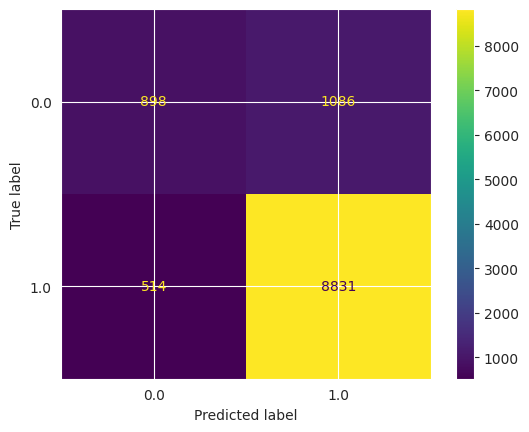

In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize = None)

Acuracy bien pero no detecta bien los 0 debido a que el dataset esta muy desbalanceado. Procedemos a balancearlo

### Rebalanceo

Debido a que los datos est√°n muy desbalanceados como hemos visto al principio del analisis exploratorio es necesario hacer un rebalnceo debido a que si no, el modelo es incapaz de predecir correctamente los valores de la clase minoritaria, en este caso los 0.

In [ ]:
# Cargamos
from imblearn.over_sampling import SMOTE
# Creamos objetos
sm = SMOTE(random_state=42)
# Retransformamos
X_res, y_res = sm.fit_resample(X_train, y_train)

Aplicamos el tuneado a los nuevos training y test por si estos cambian respecto a los no balanceados.

In [ ]:
grid_result = grid_search.fit(X_res, y_res)
# summarize results
print("Mejor accuracy: %f usando los par√°metros %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor accuracy: 0.871286 usando los par√°metros {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
model=LogisticRegression(C=100, penalty="l2", solver = "newton-cg")
model.fit(X_res,y_res)

LogisticRegression(C=100, solver='newton-cg')

[[1695  289]
 [1759 7586]]
              precision    recall  f1-score   support

         0.0       0.49      0.85      0.62      1984
         1.0       0.96      0.81      0.88      9345

    accuracy                           0.82     11329
   macro avg       0.73      0.83      0.75     11329
weighted avg       0.88      0.82      0.84     11329



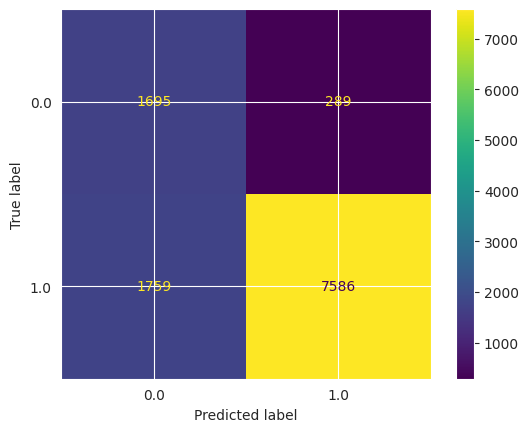

In [ ]:

y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize = None)

### Importancia de caracter√≠sticas

In [ ]:
X_columns=list(vectorizador.get_feature_names_out())+extra_features.columns.tolist()

In [ ]:
# Obtener la importancia de las variables del modelo
importance = model.coef_[0]

In [ ]:
# Primero, emparejamos los nombres de las caracter√≠sticas con su importancia
features_importances = list(zip(X_columns, importance))

# Luego, ordenamos las caracter√≠sticas por importancia en orden descendente
features_importances_sorted = sorted(features_importances, key=lambda x: x[1], reverse=True)

# Desempaquetamos las listas ordenadas
X_columns_sorted, importance_sorted = zip(*features_importances_sorted)


Feature: 0, Name: nigger, Score: 23.52940
Feature: 1, Name: islamic terrorism, Score: 20.28111
Feature: 2, Name: christian woman, Score: 19.41795
Feature: 3, Name: feminazi, Score: 18.67433
Feature: 4, Name: girl bully, Score: 14.55125
Feature: 5, Name: hindu, Score: 13.88874
Feature: 6, Name: gay joke, Score: 12.34994
Feature: 7, Name: radical, Score: 12.03740
Feature: 8, Name: bully middle, Score: 10.78894
Feature: 9, Name: bully high, Score: 10.65530
Feature: 10, Name: NUM, Score: -0.32187
Feature: 11, Name: tweet_sentiment_polarity, Score: -0.43259
Feature: 12, Name: num_mention, Score: -0.52294
Feature: 13, Name: middle school, Score: -0.78454
Feature: 14, Name: class, Score: -1.06849
Feature: 15, Name: num_URLS, Score: -1.35118
Feature: 16, Name: sent_emoji_neg, Score: -1.54863
Feature: 17, Name: mkr, Score: -1.63098
Feature: 18, Name: bullying, Score: -1.70902
Feature: 19, Name: kat andre, Score: -8.10661


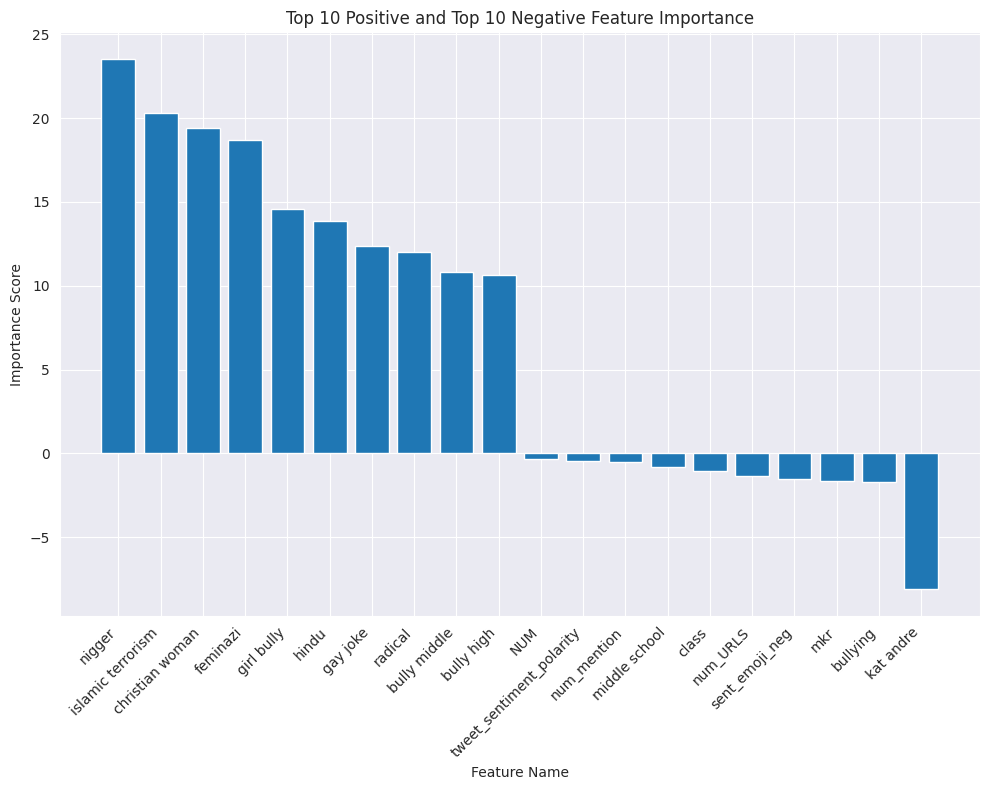

In [ ]:
# Seleccionamos solo las 10 m√°s positivas y las 10 m√°s negativas
top_features = X_columns_sorted[:10] + X_columns_sorted[-10:]
top_importance = importance_sorted[:10] + importance_sorted[-10:]

# Mostrar el n√∫mero de la caracter√≠stica, con su nombre, y su score de importancia
for i, (feature, importance) in enumerate(zip(top_features, top_importance)):
    print('Feature: %0d, Name: %s, Score: %.5f' % (i, feature, importance))

# Crear el plot
plt.figure(figsize=(10, 8))  # Ajusta el tama√±o del gr√°fico seg√∫n necesites
plt.bar(top_features, top_importance)  # Usar nombres de caracter√≠sticas ordenadas en el eje x

# Mejorar el gr√°fico
plt.xticks(rotation=45, ha="right")  # Rota los nombres en el eje x para mejor lectura
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')
plt.title('Top 10 Positive and Top 10 Negative Feature Importance')
plt.tight_layout()  # Ajusta autom√°ticamente los par√°metros del subplot para que el subplot(s) encaje en el √°rea de la figura.

plt.show()